<a href="https://colab.research.google.com/github/DavidGerardo2/Actividades/blob/main/AF7_RNP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# AF7: Redes Neuronales Artificiales
# Datos del equipo:
# - David Gerardo Guipzot Sanchez - 2173741 - Martes N4,N5,N6
# Fecha: 31 de octubre del 2025

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Mensaje de confirmación
print(f"TensorFlow (Keras) version: {tf.__version__}")
print(f"NumPy version: {np.__version__}")

TensorFlow (Keras) version: 2.19.0
NumPy version: 2.0.2


In [4]:
# Cargar el conjunto de datos MNIST desde Keras
# La función ya divide los datos en entrenamiento y prueba
(train_data, train_labels), (test_data, test_labels) = keras.datasets.mnist.load_data()

# Mostrar la forma (dimensiones) de los datos cargados
print(f"Datos de entrenamiento (imágenes): {train_data.shape}")
print(f"Datos de entrenamiento (etiquetas): {train_labels.shape}")
print(f"Datos de prueba (imágenes): {test_data.shape}")
print(f"Datos de prueba (etiquetas): {test_labels.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Datos de entrenamiento (imágenes): (60000, 28, 28)
Datos de entrenamiento (etiquetas): (60000,)
Datos de prueba (imágenes): (10000, 28, 28)
Datos de prueba (etiquetas): (10000,)


In [8]:
# 1. Aplanamos las imágenes: de (N, 28, 28) a (N, 784)
train_data_flat = train_data.reshape(train_data.shape[0], 28 * 28)
test_data_flat = test_data.reshape(test_data.shape[0], 28 * 28)

# 2. Normalizamos los datos (escalar de 0-255 a 0-1)
train_data_norm = train_data_flat.astype('float32') / 255.0
test_data_norm = test_data_flat.astype('float32') / 255.0

# Verificamos las nuevas formas
print("\n--- Datos Preprocesados ---")
print(f"Forma de datos de entrenamiento (aplanados y normalizados): {train_data_norm.shape}")
print(f"Forma de datos de prueba (aplanados y normalizados): {test_data_norm.shape}")


--- Datos Preprocesados ---
Forma de datos de entrenamiento (aplanados y normalizados): (60000, 784)
Forma de datos de prueba (aplanados y normalizados): (10000, 784)


In [9]:
# --- 1. Propuesta de la estructura de la Red Neuronal ---
model = keras.Sequential([
    # Capa de entrada: 784 neuronas (una por cada píxel aplanado)
    layers.Input(shape=(784,)),

    # Capa oculta: 128 neuronas, con activación 'relu'
    layers.Dense(128, activation='relu'),

    # Capa de salida: 10 neuronas (una por cada dígito 0-9)
    # Activación 'softmax' (requerida por la actividad)
    layers.Dense(10, activation='softmax')
])

# --- 2. Compilar el modelo ---
model.compile(
    optimizer='adam', # Optimizador eficiente
    loss='sparse_categorical_crossentropy', # Función de pérdida para clasificación
    metrics=['accuracy'] # Métrica solicitada
)

# Mostrar un resumen de la arquitectura
model.summary()

# --- 3. Entrenar el modelo (función "fit") ---
print("\n--- Iniciando Entrenamiento ---")
history = model.fit(
    train_data_norm,    # Imágenes de entrenamiento
    train_labels,       # Etiquetas de entrenamiento
    epochs=10,          # Número de veces que verá los datos
    batch_size=128,     # Paquetes de datos por actualización
    validation_split=0.1 # Usa un 10% de los datos para validar
)
print("--- Entrenamiento Finalizado ---")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)


--- Iniciando Entrenamiento ---
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8199 - loss: 0.6528 - val_accuracy: 0.9553 - val_loss: 0.1665
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9464 - loss: 0.1944 - val_accuracy: 0.9672 - val_loss: 0.1219
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9641 - loss: 0.1267 - val_accuracy: 0.9723 - val_loss: 0.1037
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9717 - loss: 0.0974 - val_accuracy: 0.9742 - val_loss: 0.0914
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9773 - loss: 0.0785 - val_accuracy: 0.9763 - val_loss: 0.0859
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9818 - loss: 0.0647 - val_accuracy: 0.9775 - val_loss: 0.0816
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9844 - loss: 0.0561 - val_accuracy: 0.9780 - val_loss: 0.0757
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9870 


--- Evaluación con Datos de Prueba ---
313/313 - 1s - 2ms/step - accuracy: 0.9778 - loss: 0.0736

Pérdida (Loss) en prueba: 0.0736
Exactitud (Accuracy) en prueba: 97.78%

--- 5 Predicciones de Ejemplo ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

Predicción 1:
  > Valor Predicho: 7
  > Valor Real:     7


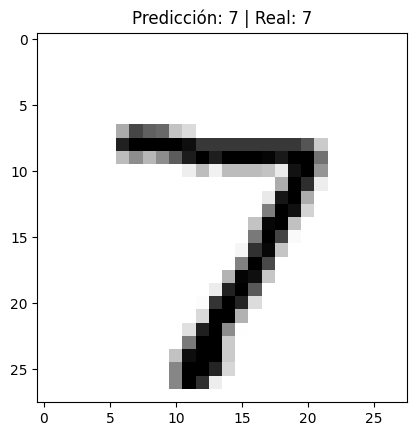


Predicción 2:
  > Valor Predicho: 2
  > Valor Real:     2


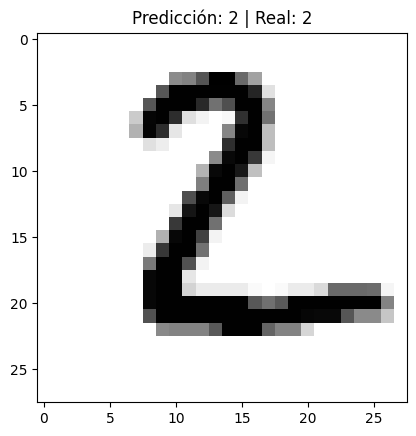


Predicción 3:
  > Valor Predicho: 1
  > Valor Real:     1


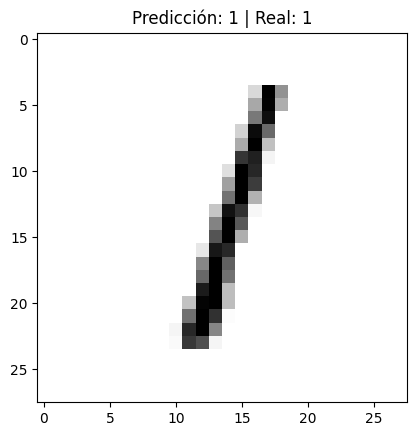


Predicción 4:
  > Valor Predicho: 0
  > Valor Real:     0


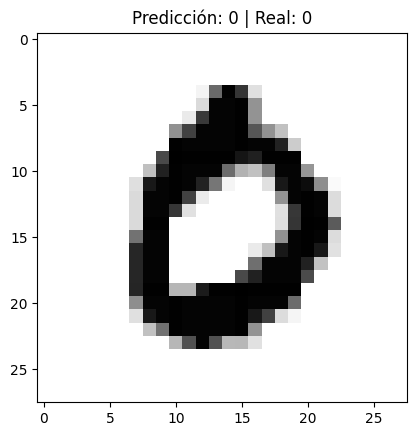


Predicción 5:
  > Valor Predicho: 4
  > Valor Real:     4


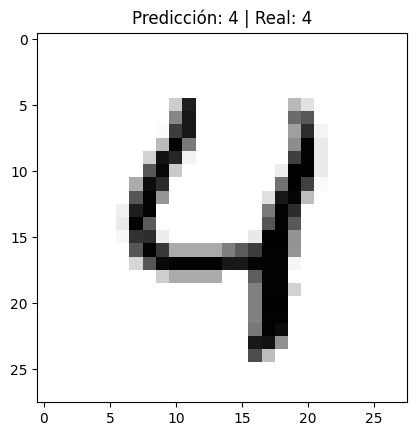

In [10]:
# --- 1. Evaluar el modelo con los datos de prueba (función "evaluate") ---
print("\n--- Evaluación con Datos de Prueba ---")
test_loss, test_accuracy = model.evaluate(test_data_norm, test_labels, verbose=2)
print(f"\nPérdida (Loss) en prueba: {test_loss:.4f}")
print(f"Exactitud (Accuracy) en prueba: {test_accuracy * 100:.2f}%")

# --- 2. Realizar 5 diferentes predicciones ---
print("\n--- 5 Predicciones de Ejemplo ---")

# Tomamos las primeras 5 imágenes del conjunto de prueba
predictions = model.predict(test_data_norm[:5])

for i in range(5):
    # 'argmax' encuentra la neurona con la probabilidad más alta (el dígito predicho)
    predicted_digit = np.argmax(predictions[i])

    # Obtenemos la etiqueta real
    actual_digit = test_labels[i]

    print(f"\nPredicción {i+1}:")
    print(f"  > Valor Predicho: {predicted_digit}")
    print(f"  > Valor Real:     {actual_digit}")

    # Mostramos la imagen original (del 'test_data' sin aplanar)
    plt.imshow(test_data[i], cmap=plt.cm.binary)
    plt.title(f"Predicción: {predicted_digit} | Real: {actual_digit}")
    plt.show()